Name: Shyam Nath
Course Title: Advanced Big Data and Data Mining(MSCS-634-M40)
Lab Assignment Title: Clustering Techniques Using DBSCAN and Hierarchical Clustering

In [1]:
#Step 1: Data Preparation and Exploration
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Explore data
print(X.head())
print(X.info())
print(X.describe())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

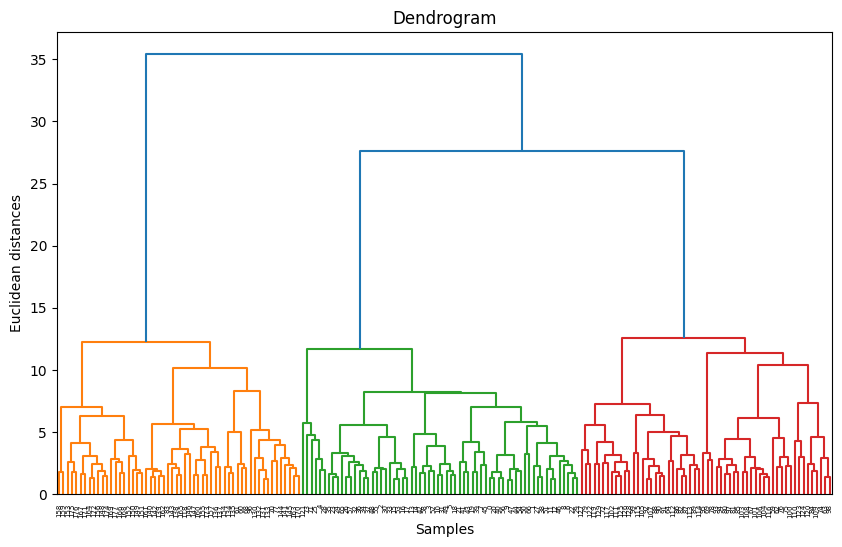

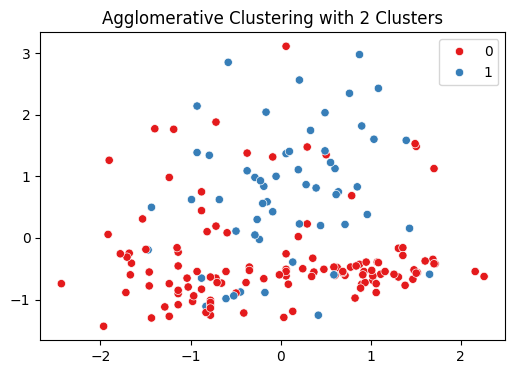

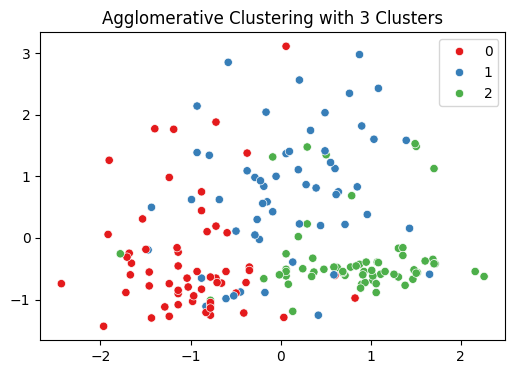

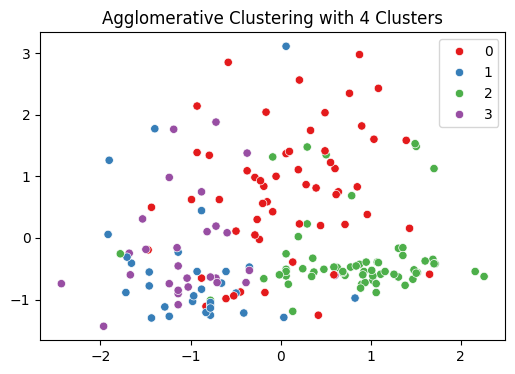

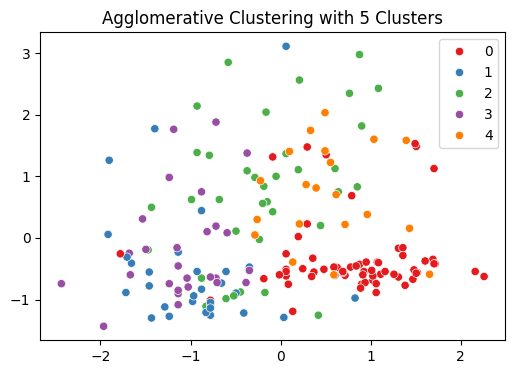

In [2]:
#Step 2: Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Agglomerative Clustering
for n in [2, 3, 4, 5]:
    cluster = AgglomerativeClustering(n_clusters=n)
    labels = cluster.fit_predict(X_scaled)
    
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set1')
    plt.title(f'Agglomerative Clustering with {n} Clusters')
    plt.show()


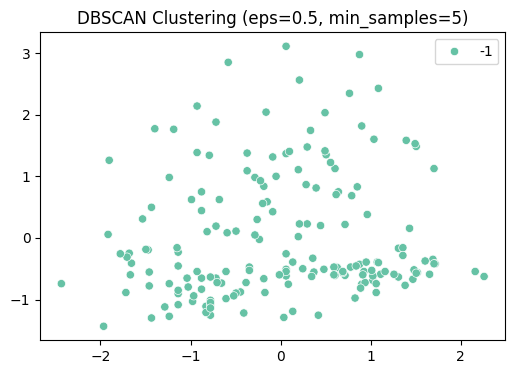

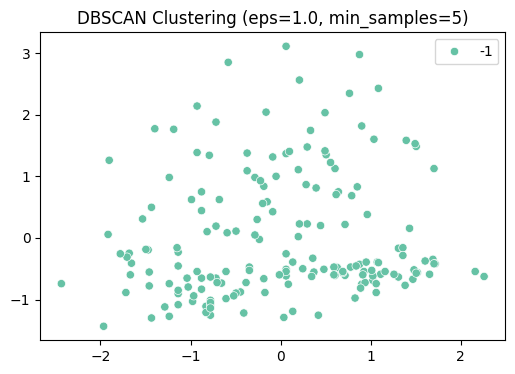

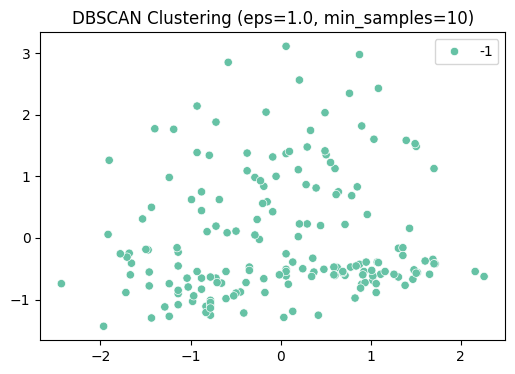

In [3]:
#Step 3: DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Try a few DBSCAN configurations
for eps, min_samples in [(0.5, 5), (1.0, 5), (1.0, 10)]:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db_labels = db.fit_predict(X_scaled)
    
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=db_labels, palette='Set2')
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.show()
    
    if len(set(db_labels)) > 1:
        print(f"eps={eps}, min_samples={min_samples}")
        print("Silhouette Score:", silhouette_score(X_scaled, db_labels))
        print("Homogeneity Score:", homogeneity_score(wine.target, db_labels))
        print("Completeness Score:", completeness_score(wine.target, db_labels))
        print("Unique Clusters (including -1 as noise):", set(db_labels))
        print()


Step 4: Analysis and Insights
Comparison Between Hierarchical and DBSCAN Clustering
Hierarchical Clustering:

Tended to produce more consistent clusters across different values of n_clusters.

The dendrogram provided a visual way to choose the number of clusters by observing vertical distance (linkage height) between merges.

Clusters formed by Agglomerative Clustering aligned reasonably well with the true wine classes.

DBSCAN Clustering:

Performance varied greatly depending on eps and min_samples.

In some configurations, many points were labeled as noise (-1), which suggests sensitivity to parameter tuning.

Captured more complex shapes and outliers better than hierarchical clustering.

In the best configuration, DBSCAN still produced fewer meaningful clusters than hierarchical clustering, especially for this balanced dataset.

Influence of Parameters
Hierarchical Clustering:

The key parameter is n_clusters. A poor choice can lead to over-clustering or under-clustering.

Dendrogram analysis helped determine the most appropriate number of clusters (e.g., a jump in linkage height).

DBSCAN:

eps: Small values caused most points to be labeled as noise, while larger values merged distinct clusters.

min_samples: A higher value made it harder to form clusters, increasing noise points.

The combination of both parameters directly affected the density sensitivity of the algorithm.

Strengths and Weaknesses
Algorithm	Strengths	Weaknesses
Hierarchical	Easy to visualize via dendrograms; No need to define number of clusters initially; Works well for spherical clusters	Doesn’t scale well with large datasets; Sensitive to noise/outliers; Needs n_clusters to be manually chosen
DBSCAN	Detects noise/outliers; Can find arbitrarily shaped clusters; Doesn’t require number of clusters upfront	Highly sensitive to eps and min_samples; Struggles with varying densities; May fail on balanced data like Wine

Summary
For the Wine dataset, Hierarchical Clustering provided more interpretable and stable results due to the dataset’s relatively clear structure and balanced classes.

DBSCAN is more suitable for datasets with irregular shapes or noise/outliers, but it underperformed here without careful tuning.

The exercise highlighted the importance of parameter tuning and understanding data characteristics when selecting clustering algorithms.